In [55]:
# Importing libraries needed for this project 

import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [56]:
# Reading and loading the dataset into our notebook

df = pd.read_csv('C:/Users/Harpreet/Downloads/example_air_passengers.csv')

df.head(5)


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [67]:
# Checking the datatypes of the given dataset

df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [58]:

df['ds'] = pd.DatetimeIndex(df['ds'])
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

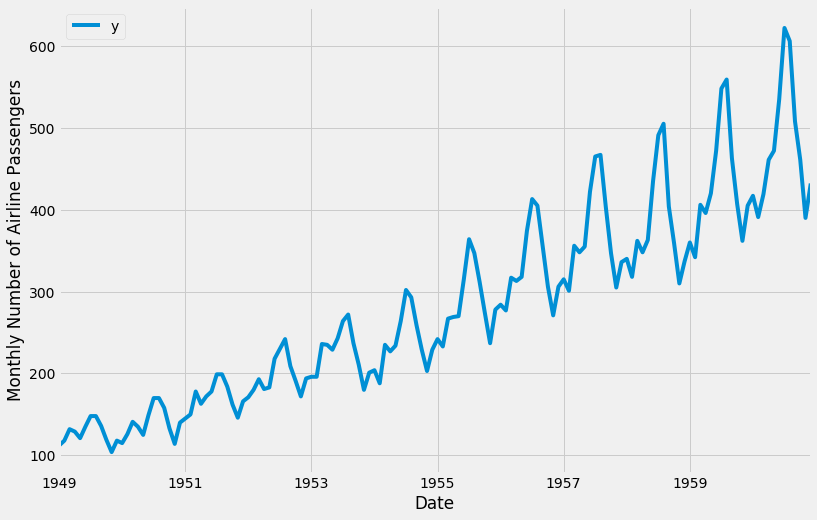

In [60]:
ax = df.set_index('ds').plot(figsize= (12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [61]:
my_model = Prophet()

In [62]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\ANACONDA\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [63]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [64]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.511816,621.204201,677.463896
176,1963-09-01,601.983199,574.470852,628.121611
177,1963-10-01,565.980192,540.862546,598.006346
178,1963-11-01,534.021253,504.558295,562.854553
179,1963-12-01,563.611828,533.733215,592.524834


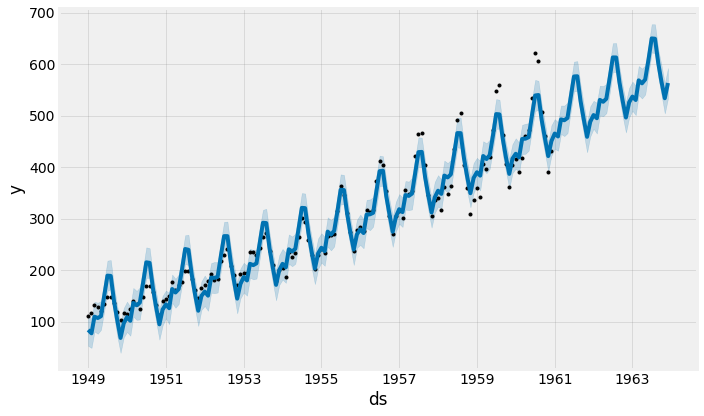

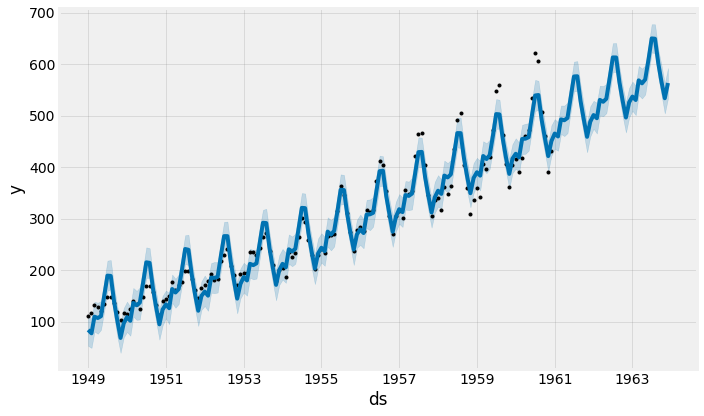

In [65]:
my_model.plot(forecast)

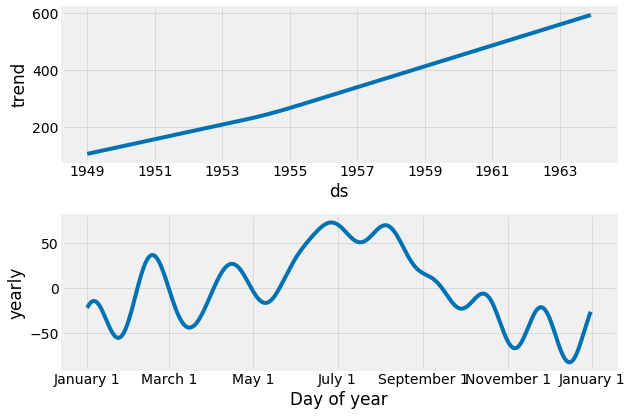

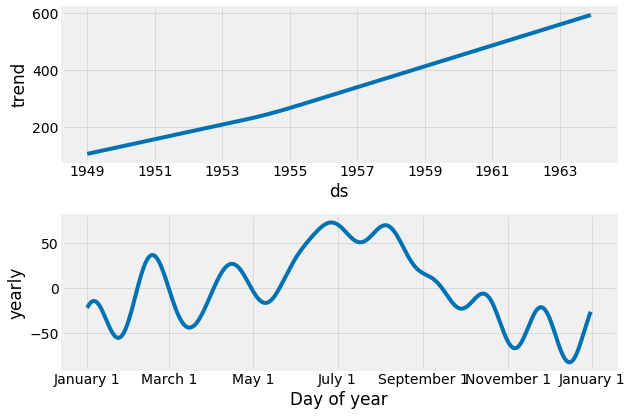

In [66]:
my_model.plot_components(forecast)